# AGNQSO Summary catalogue exploration

This is an example notebook which demonstrates use cases fo the AGNQSO summary catalog.

All functions and final wrapper script to live in py/ * .py.

Notebook direct contirbutions:

* Alexander, D (Univ. of Durham, Durham, UK) (VI merging done by DA)
* Alfarsy, R (Univ. of Portsmouth, Portsmouth, UK)
* Canning, B (Univ. of Portsmouth, Portsmouth, UK)
* Chaussidon, E (CEA Saclay, Paris, France) (QSO catalogs generated by EC et al.)
* Juneau, S (NOIRLab, Arizona, USA)
* Mezcua, M (Institut de Ciències de l'Espai, Barcelona, Spain)
* Moustakas, J (Siena College, New York, USA) (FastSpecFit catalogues by JM)
* Pucha, R (Univ. of Arizona, Arizona, USA) 

## Docs:
Readme:
Wiki: 
Github: 

Directions for VACs: https://desi.lbl.gov/trac/wiki/Pipeline/Releases/EDR/Planning/ValueAdded

Our VAC directory: /global/cfs/cdirs/desi/science/gqp/agncatalog/  

## Imports

In [42]:
# General imports
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import LogNorm
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import os.path
import yaml

# Import Astropy libraries - useful for many astronomy related function
from astropy.table import Table #, join, Column
from astropy.io import fits
#import fitsio

# DESI modules
#from desispec.zcatalog import find_primary_spectra, create_summary_catalog  # at NERSC needs DESI master
#from desitarget.targetmask import desi_mask, bgs_mask, scnd_mask      # For the main survey
from desiutil.bitmask import BitMask

# GQP_CODE
import sys
sys.path.append("../py/")
import set_agn_masksDESI

#https://www.legacysurvey.org/viewer?ra=10.1572&dec=-0.3316&layer=ls-dr9&zoom=16

## 1. First we open the catalog.

In [43]:
# Open the catalog
agn_hdul = fits.open('/global/cfs/cdirs/desi/science/gqp/agncatalog/catalog/agnqso_sum_v1.0.2fits', format='fits')
agn_hdul.info()
# Store the fits table
T = Table(agn_hdul[1].data)

Filename: /global/cfs/cdirs/desi/science/gqp/agncatalog/catalog/agnqso_sum_v1.0.2fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU    317   2254019R x 144C   [K, D, D, K, 6A, J, D, D, 4A, E, I, K, K, I, E, K, K, K, K, K, K, K, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, J, K, 7A, 6A, E, J, L, K, L, D, D, 1A, K, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, K, K]   


## 2. What columns are in the catalog

In [44]:
# What are the columns?
T.columns

<TableColumns names=('TARGETID','Z','ZERR','ZWARN','SPECTYPE','COADD_FIBERSTATUS','TARGET_RA','TARGET_DEC','MORPHTYPE','EBV_1','MASKBITS','DESI_TARGET','SCND_TARGET','COADD_NUMEXP','COADD_EXPTIME','CMX_TARGET','SV1_DESI_TARGET','SV2_DESI_TARGET','SV3_DESI_TARGET','SV1_SCND_TARGET','SV2_SCND_TARGET','SV3_SCND_TARGET','TSNR2_LYA','TSNR2_QSO','DELTA_CHI2_MGII','A_MGII','SIGMA_MGII','B_MGII','VAR_A_MGII','VAR_SIGMA_MGII','VAR_B_MGII','Z_RR','Z_QN','C_LYA','C_CIV','C_CIII','C_MgII','C_Hbeta','C_Halpha','Z_LYA','Z_CIV','Z_CIII','Z_MgII','Z_Hbeta','Z_Halpha','QSO_MASKBITS','HPXPIXEL','SURVEY','PROGRAM','TSNR2_LRG','SV_NSPEC','SV_PRIMARY','ZCAT_NSPEC','ZCAT_PRIMARY','QN_C_LINE_BEST','QN_C_LINE_SECOND_BEST','PHOTSYS','LS_ID','FIBERFLUX_G','FIBERFLUX_R','FIBERFLUX_Z','FIBERTOTFLUX_G','FIBERTOTFLUX_R','FIBERTOTFLUX_Z','FLUX_G','FLUX_R','FLUX_Z','FLUX_W1','FLUX_W2','FLUX_W3','FLUX_W4','FLUX_IVAR_G','FLUX_IVAR_R','FLUX_IVAR_Z','FLUX_IVAR_W1','FLUX_IVAR_W2','FLUX_IVAR_W3','FLUX_IVAR_W4','EBV_2','MW_

## 3. The maskbits columns are how we access the agn types

In [45]:
from set_agn_masksDESI import get_qso_maskbits
QSO_MASKBITS, AGN_MASKBITS, AGN_TYPE = get_qso_maskbits('../py/agnmask.yaml')

In [46]:
print(QSO_MASKBITS)

QSO_MASKBITS:
  - [RR,               1, "RR determines this to be a QSO from template fitting"]
  - [MGII,             2, "MgII afterburner detects broad line"]
  - [QN,               3, "Quasar Net reclassifies as a QSO"]
  - [QN_NEW_RR,        4, "Quasar Net prompts different RR redshift"]


In [47]:
print(AGN_MASKBITS)

AGN_MASKBITS:
  - [AGN_ANY,          0, "any agn classification is set"]
  - [RR,               1, "RR determines this to be a QSO from template fitting"]
  - [MGII,             2, "MgII afterburner detects broad line"]
  - [QN,               3, "Quasar Net reclassifies as a QSO"]
  - [QN_NEW_RR,        4, "Quasar Net prompts different RR redshift"]
  - [BPT_ANY_AGN,      5, "At least one BPT diagnostic indicates SEYFERT, LINER or COMPOSITE"]
  - [OPT_OTHER_AGN,    6, "Rest frame optical emission lines diagnostic not bpt (4000-10000 ang) indicate agn"]
  - [UV,               7, "Rest frame UV emission lines indicate agn"]
  - [WISE,             8, "Infrared (WISE) colours indicate agn"]
  - [XRAY,             9, "X-rays indicate agn"]
  - [RADIO,           10, "Radio indicates agn"]


In [48]:
print(AGN_TYPE)

AGN_TYPE:
  - [UNKNOWN,          0, "Unknown agn type"]
  - [TYPE1,            1, "Type 1 agn (FWHM>1500 km/s or >1000 km/s in a Balmer line)"]
  - [TYPE2,            2, "Type 2 agn (FWHM<1500 km/s or <1000 km/s in a Balmer line)"]
  - [BPT_SY,           3, "Any BPT diagnostic indicates Seyfert"]
  - [BPT_LINER,        4, "Any BPT diagnostic indicates LINER"]
  - [NII_BPT_AV,       5, "NII BPT diagnostic is avalible"]
  - [NII_SF,           6, "NII BPT Star-forming"]
  - [NII_COMP,         7, "NII BPT Composite"]
  - [NII_SY,           8, "NII BPT Seyfert"]
  - [NII_LINER,        9, "NII BPT LINER"]
  - [NII_QUIES,       10, "NII BPT Quiescent, Lines detected with (S/N) < 3"]
  - [SII_BPT_AV,      11, "SII BPT diagnostic is available"]
  - [SII_SF,          12, "SII BPT Star-forming"]
  - [SII_SY,          13, "SII BPT Seyfert"]
  - [SII_LINER,       14, "SII BPT LINER"]
  - [SII_QUIES,       15, "SII BPT Quiescent, Lines detected with (S/N) < 3"]
  - [OI_BPT_AV,       16, "OI BPT dian

## 4. Plot BPT

In [49]:
#set_agn_masksDESI.test_bpt_mask(T, AGN_TYPE, '.')

Text(0, 0.5, 'log ([OIII]/H$\\beta$)')

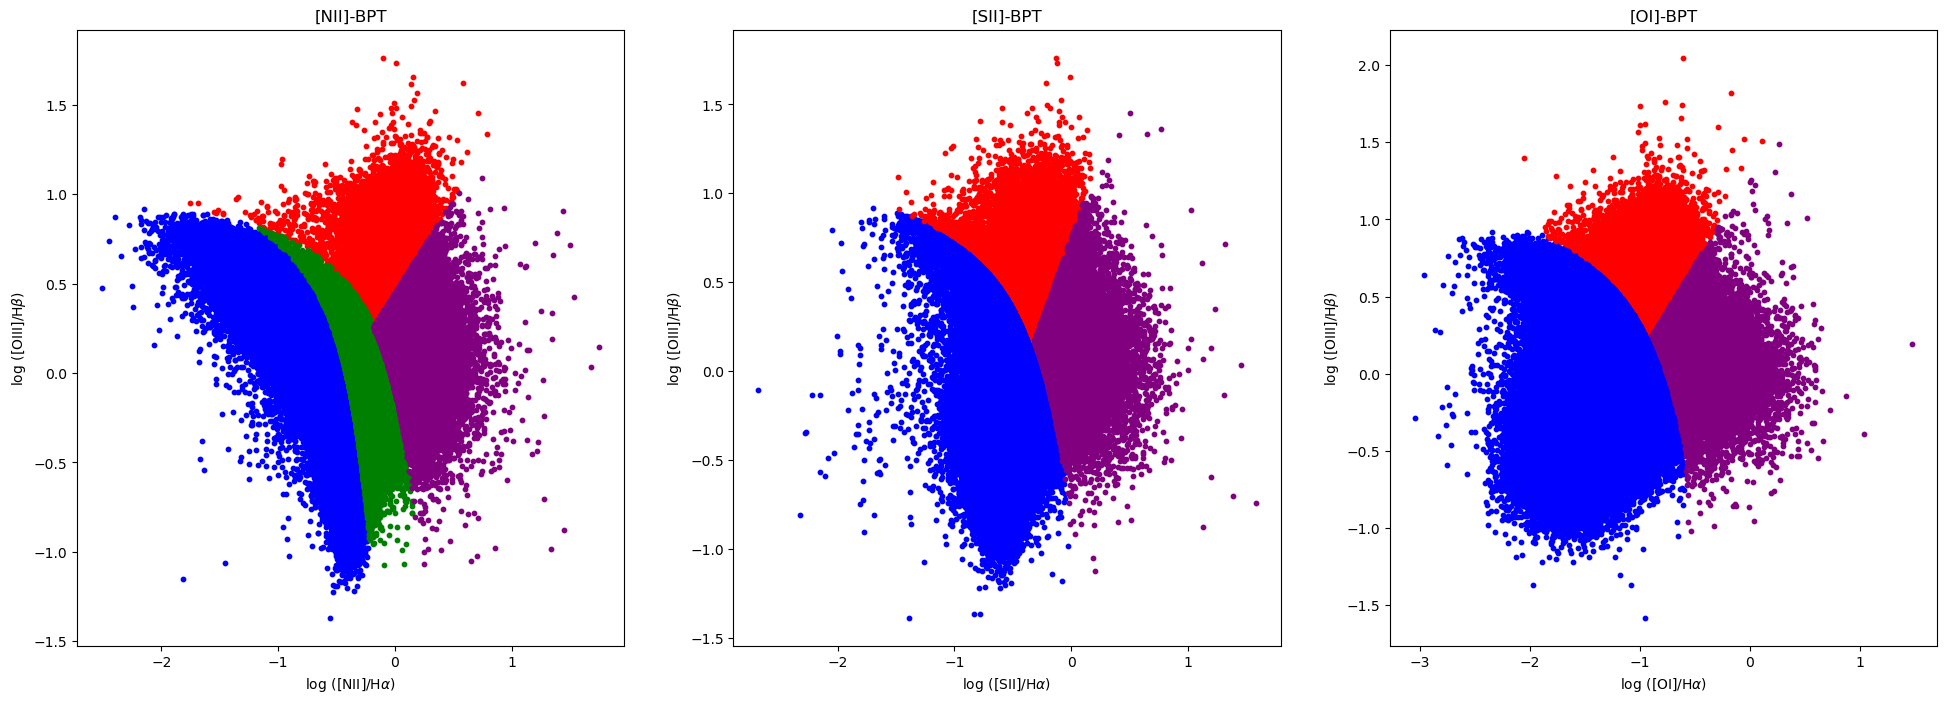

In [50]:
nii_sf = (T['AGN_TYPE'] & AGN_TYPE.NII_SF != 0)
nii_sy = (T['AGN_TYPE'] & AGN_TYPE.NII_SY != 0)
nii_lin = (T['AGN_TYPE'] & AGN_TYPE.NII_LINER != 0)
nii_comp = (T['AGN_TYPE'] & AGN_TYPE.NII_COMP != 0)

sii_sf = (T['AGN_TYPE'] & AGN_TYPE.SII_SF != 0)
sii_sy = (T['AGN_TYPE'] & AGN_TYPE.SII_SY != 0)
sii_lin = (T['AGN_TYPE'] & AGN_TYPE.SII_LINER != 0)

oi_sf = (T['AGN_TYPE'] & AGN_TYPE.OI_SF != 0)
oi_sy = (T['AGN_TYPE'] & AGN_TYPE.OI_SY != 0)
oi_lin = (T['AGN_TYPE'] & AGN_TYPE.OI_LINER != 0)

xx_bptnii=np.log10(T['NII_6584_FLUX']/T['HALPHA_FLUX'])
xx_bptsii = np.log10((T['SII_6716_FLUX']+T['SII_6731_FLUX'])/T['HALPHA_FLUX'])
xx_bptoi = np.log10(T['OI_6300_FLUX']/T['HALPHA_FLUX'])

yy_bpt=np.log10(T['OIII_5007_FLUX']/T['HBETA_FLUX'])
plt.figure(figsize = (24,8))

plt.subplot2grid((1,3), (0,0))
plt.title('[NII]-BPT')
plt.scatter(xx_bptnii[nii_sf], yy_bpt[nii_sf], color = 'b', s = 10)
plt.scatter(xx_bptnii[nii_sy], yy_bpt[nii_sy], color = 'r', s = 10)
plt.scatter(xx_bptnii[nii_comp], yy_bpt[nii_comp], color = 'g', s = 10)
plt.scatter(xx_bptnii[nii_lin], yy_bpt[nii_lin], color = 'purple', s = 10)
plt.xlabel('log ([NII]/H$\\alpha$)')
plt.ylabel('log ([OIII]/H$\\beta$)')

plt.subplot2grid((1,3), (0,1))
plt.title('[SII]-BPT')
plt.scatter(xx_bptsii[sii_sf], yy_bpt[sii_sf], color = 'b', s = 10)
plt.scatter(xx_bptsii[sii_sy], yy_bpt[sii_sy], color = 'r', s = 10)
plt.scatter(xx_bptsii[sii_lin], yy_bpt[sii_lin], color = 'purple', s = 10)
plt.xlabel('log ([SII]/H$\\alpha$)')
plt.ylabel('log ([OIII]/H$\\beta$)')

plt.subplot2grid((1,3), (0,2))
plt.title('[OI]-BPT')
plt.scatter(xx_bptoi[oi_sf], yy_bpt[oi_sf], color = 'b', s = 10)
plt.scatter(xx_bptoi[oi_sy], yy_bpt[oi_sy], color = 'r', s = 10)
plt.scatter(xx_bptoi[oi_lin], yy_bpt[oi_lin], color = 'purple', s = 10)
plt.xlabel('log ([OI]/H$\\alpha$)')
plt.ylabel('log ([OIII]/H$\\beta$)')

In [92]:
nii_liner = (agn_tab['AGN_TYPE'] & AGN_TYPE.NII_LINER != 0)
nii_liner_tab = agn_tab[nii_liner]
liner_cut=nii_liner_tab['TARGETID','HPXPIXEL','SURVEY','PROGRAM']

In [93]:
nii_seyfert = (agn_tab['AGN_TYPE'] & AGN_TYPE.NII_SY != 0)
nii_seyfert_tab = agn_tab[nii_seyfert]
seyfert_cut=nii_seyfert_tab['TARGETID','HPXPIXEL','SURVEY','PROGRAM']

In [94]:
len(liner_cut)

18224

In [95]:
len(seyfert_cut)

12247

In [96]:
all_liner = (agn_tab['AGN_TYPE'] & AGN_TYPE.NII_LINER != 0) & (agn_tab['AGN_TYPE'] & AGN_TYPE.SII_LINER != 0) & (agn_tab['AGN_TYPE'] & AGN_TYPE.OI_LINER != 0)
all_liner_tab = agn_tab[all_liner]
all_liner_cut=all_liner_tab['TARGETID','HPXPIXEL','SURVEY','PROGRAM']

In [97]:
all_seyfert = (agn_tab['AGN_TYPE'] & AGN_TYPE.NII_SY != 0) & (agn_tab['AGN_TYPE'] & AGN_TYPE.SII_SY != 0) & (agn_tab['AGN_TYPE'] & AGN_TYPE.OI_SY != 0)
all_seyfert_tab = agn_tab[all_seyfert]
all_seyfert_cut=all_seyfert_tab['TARGETID','HPXPIXEL','SURVEY','PROGRAM']

In [98]:
len(all_liner_cut)

5213

In [99]:
len(all_seyfert_cut)

6100

In [12]:
#liner_cut.write('/global/cfs/cdirs/desi/science/gqp/agncatalog/catalog/nii_liner_v1.0.1fits', format='fits',overwrite=True)
#seyfert_cut.write('/global/cfs/cdirs/desi/science/gqp/agncatalog/catalog/nii_seyfert_v1.0.1fits', format='fits',overwrite=True)
#all_liner_cut.write('/global/cfs/cdirs/desi/science/gqp/agncatalog/catalog/all_nii_liner_v1.0.1fits', format='fits',overwrite=True)
#all_seyfert_cut.write('/global/cfs/cdirs/desi/science/gqp/agncatalog/catalog/all_nii_seyfert_v1.0.1fits', format='fits',overwrite=True)